In [18]:
import cv2 
import numpy as np
import pandas as pd
from src.tracking.kalman_filter import KalmanFilter
from src.tracking.position_calculation import project_3d_to_2d_left
from pathlib import Path
import matplotlib.pyplot as plt


In [19]:
root_dir = Path.cwd().parent
data_dir = root_dir / "data"

csv_file = data_dir / "raw/test_kalman_working.csv"

In [20]:
dp_left = data_dir / "raw"/"final_project_2023_rect" / "seq_03" / "image_02/data"

glob_left = sorted(dp_left.glob("*.png"))

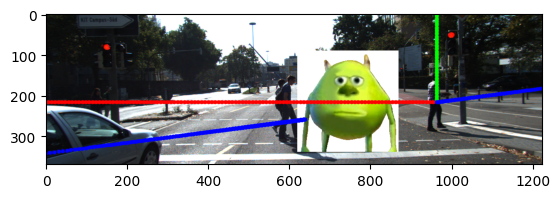

In [21]:
starting_point = np.array([-3.298049,	0.492611,	14.617274	])


img = cv2.imread(str(glob_left[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create a loop that increments the starting point by 10cm in x direction 100 times and draws the projection onto the image in glob_left
for dx in range(1000):
    next_point = starting_point + np.array([dx/10, 0, 0])
    projected_point = project_3d_to_2d_left(next_point)


    # draw the projected point onto the image
    img = cv2.circle(img, (int(projected_point[0]), int(projected_point[1])), 5, (255,0,0), -1)

# do the same for the y direction
for dy in range(1000):
    next_point = starting_point + np.array([0, dy/10, 0])
    projected_point = project_3d_to_2d_left(next_point)


    # draw the projected point onto the image
    img = cv2.circle(img, (int(projected_point[0]), int(projected_point[1])), 5, (0,255,0), -1)

# do the same for the z direction
for dz in range(1000):
    next_point = starting_point + np.array([0, 0, -dz/10])
    projected_point = project_3d_to_2d_left(next_point)


    # draw the projected point onto the image
    img = cv2.circle(img, (int(projected_point[0]), int(projected_point[1])), 5, (0,0,255), -1)

# show the image with matplotlib
plt.imshow(img)
plt.show()



In [22]:
import numpy as np

In [23]:
# create a column vector filled with zeroes 6x1
va_z = np.zeros((6,1))

In [16]:
va_z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [17]:
xm = 1
ym = 2
zm = 3

# create a column vector from xyz
x = np.array([[xm], [ym], [zm]])

# stack x on top of va_z
x = np.vstack((x, va_z))
x

array([[1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])